# HW2 : Classification

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('Wine.csv', header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
wine.columns = ['Name', 
                'Alcohol', 
                'MalicAcid', 
                'Ash', 
                'AlcalinityOfAsh', 
                'Magnesium', 
                'TotalPhenols', 
                'Flavanoids', 
                'NonFlavanoidPhenols', 
                'Proanthocyanins', 
                'ColorIntensity', 
                'Hue', 
                'OD280/OD315', 
                'Proline']

wine.info() # Cheking NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Name                   178 non-null int64
Alcohol                178 non-null float64
MalicAcid              178 non-null float64
Ash                    178 non-null float64
AlcalinityOfAsh        178 non-null float64
Magnesium              178 non-null int64
TotalPhenols           178 non-null float64
Flavanoids             178 non-null float64
NonFlavanoidPhenols    178 non-null float64
Proanthocyanins        178 non-null float64
ColorIntensity         178 non-null float64
Hue                    178 non-null float64
OD280/OD315            178 non-null float64
Proline                178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
wine.describe()

,Name,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonFlavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


#### Feature Selection

In [5]:
# 1. Univariate Selection w/ SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [6]:
X = wine.iloc[:,1:13]  # variable columns
y = wine.iloc[:,0]    # target column 

bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(5,'Score'))  

             Specs    Score
6       Flavanoids  233.926
11     OD280/OD315  189.972
0          Alcohol  135.078
9   ColorIntensity  120.664
10             Hue  101.317


(6.5, -0.5)

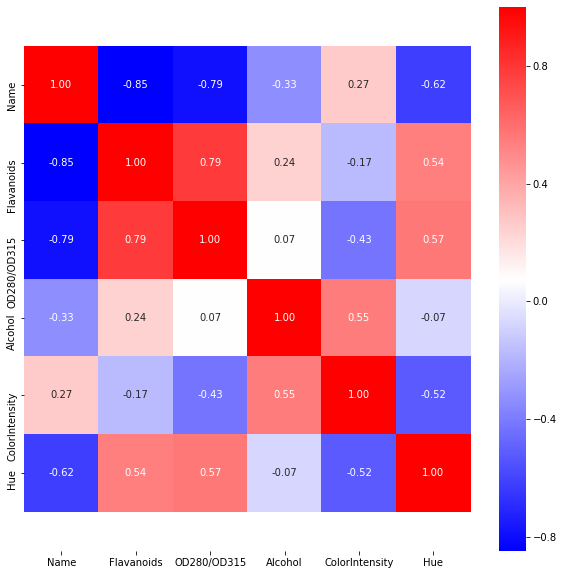

In [7]:
data_1 = wine[['Name',
               'Flavanoids',
               'OD280/OD315', 
               'Alcohol',
               'ColorIntensity',  
               'Hue']]

fig, ax = plt.subplots(figsize=(10, 10))
htm = sns.heatmap(data_1.corr(), annot=True, ax=ax, fmt='.2f', cmap='bwr')
bottom, top = htm.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

C:\Users\LOGAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.18  0.034 0.043 0.044 0.041 0.074 0.184 0.035 0.02  0.109 0.089 0.147]


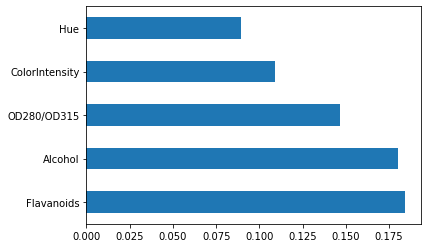

In [8]:
# 2. Feature Importance w/ ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [9]:
X_fin = wine[['Flavanoids',
              'OD280/OD315', 
              'Alcohol',
              'ColorIntensity',
              'Hue']]

#### Classification

In [10]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.3, random_state=2020)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 5) (124,)
(54, 5) (54,)


In [11]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(X_train, y_train)
print('LDA Train :', lda.score(X_train, y_train))
print('LDA Test :', lda.score(X_test, y_test))

LDA Train : 0.9112903225806451
LDA Test : 0.9629629629629629


In [12]:
# QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA().fit(X_train, y_train)
print('QDA Train :', qda.score(X_train, y_train))
print('QDA Test :', qda.score(X_test, y_test))

QDA Train : 0.9758064516129032
QDA Test : 0.9814814814814815


In [13]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression as LR
Logit = LR(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, y_train)
print('Logistic Train :', Logit.score(X_train, y_train))
print('Logistic Test :', Logit.score(X_test, y_test))

Logistic Train : 0.9435483870967742
Logistic Test : 0.9629629629629629


In [14]:
# Logistic Regression w/ Feature Expansion

from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import cross_val_score as cvs
for i in range(1,4):
    poly = PF(degree=i)
    X_poly = poly.fit_transform(X_train)
    log = LR(solver='sag', max_iter=10000, multi_class='auto')
    kcv_score = cvs(log, X_poly, y_train.values.ravel(), cv=5) 
    print('kcv degree',i, ':', kcv_score.mean())

kcv degree 1 : 0.9009259259259259
kcv degree 2 : 0.9012592592592593
kcv degree 3 : 0.8941851851851853


Test Score의 측면에서 봤을 때 QDA > LDA = Logit 으로 나타난다.
Logistic Regression의 차수는 1차, 2차까지는 대동소이하다가 3차부터 떨어지는 것을 볼 수 있다. 이는 QDA의 Test Score가 제일 높게 나온 것과 일맥상통한다고 볼 수 있다. 하지만 전체적으로 score값들이 높게 나온 것으로 보아 더 많은 데이터로 testing이 필요할 것으로 생각한다.